<a href="https://colab.research.google.com/github/honehaniwa/Gasyori100knock/blob/main/Question11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

In [2]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg

--2021-04-05 17:44:31--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2021-04-05 17:44:31 (56.0 MB/s) - ‘imori.jpg’ saved [12638/12638]



In [3]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg

--2021-04-05 17:44:34--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14696 (14K) [image/jpeg]
Saving to: ‘imori_noise.jpg’

imori_noise.jpg     100%[===================>]  14.35K  --.-KB/s    in 0s      

2021-04-05 17:44:34 (44.6 MB/s) - ‘imori_noise.jpg’ saved [14696/14696]



In [4]:
# 便利そうな関数を先に作っとく

def show(img):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

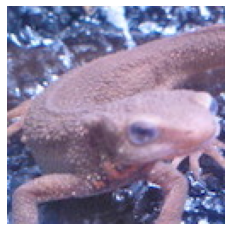

In [5]:
img_orig = cv2.imread("imori.jpg")
show(img_orig)

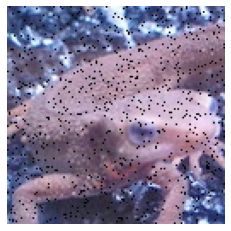

In [6]:
img_noise = cv2.imread("imori_noise.jpg")
show(img_noise)

# Q.11. 平滑化フィルタ
平滑化フィルタ(3x3)を実装せよ。

平滑化フィルタはフィルタ内の画素の平均値を出力するフィルタである。＃

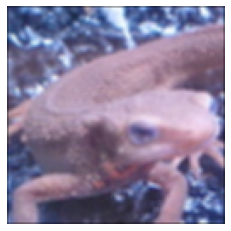

In [9]:
def mean_filter(img, siz = 3):
    H, W, C = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2, C), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()
    
    out2 = out.copy()

    for x in range(H):
        for y in range(W):
            for c in range(C):
                out[padding+y, padding+x, c] = np.mean(out2[y: y+siz, x:x+siz, c])

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
out = mean_filter(img_orig)
show(out)

# Q.12. モーションフィルタ
モーションフィルタ(3x3)を実装せよ。

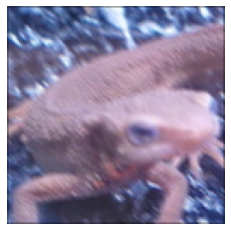

In [12]:
def motion_filter(img, siz = 3):
    H, W, C = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2, C), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()
    
    out2 = out.copy()

    for x in range(H):
        for y in range(W):
            for c in range(C):
                out[padding+y, padding+x, c] = np.mean(np.diag(out2[y: y+siz, x:x+siz, c]))

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
out = motion_filter(img_orig)
show(out)

# Q.13. MAX-MINフィルタ
MAX-MINフィルタ(3x3)を実装せよ。

In [13]:
def gray(img):
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    ret = 0.2126*R + 0.7152*G + 0.0722*B
    ret = np.clip(ret, 0, 255)
    return ret.astype(np.uint8)


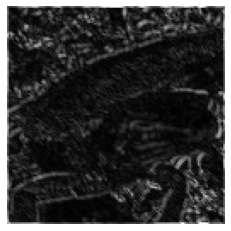

In [21]:
def min_max_filter(img, siz = 3):
    H, W = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()
    
    out2 = out.copy()

    for x in range(H):
        for y in range(W):
            out[padding+y, padding+x] = np.max(np.diag(out2[y: y+siz, x:x+ siz])) - np.min(np.diag(out2[y: y+siz, x: x+siz]))

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
img_gray = gray(img_orig)
out = min_max_filter(img_gray)
show(out)

# Q.14. 微分フィルタ
微分フィルタ(3x3)を実装せよ。

微分フィルタは輝度の急激な変化が起こっている部分のエッジを取り出すフィルタであり、隣り合う画素同士の差を取る。

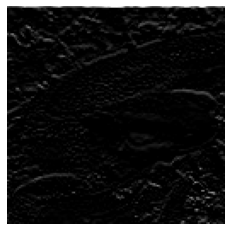

In [59]:
def differential_filter(img, siz = 3):
    H, W = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out1 = np.zeros((H + padding*2, W + padding*2), dtype = np.float)
    out1[padding: padding+H, padding: padding+W] = img.copy()
    out2 = out1.copy()

    out_tmp = out1.copy()
    
    # vertical
    v = [[0., -1., 0.],[0., 1., 0.],[0., 0., 0.]]
    # horizontal
    h = [[0., 0., 0.],[-1., 1., 0.], [0., 0., 0.]]
    
    for y in range(H):
        for x in range(W):
            out1[y+padding, x+padding] = np.sum(v * (out_tmp[y: y+siz, x: x+siz]))
            out2[y+padding, x+padding] = np.sum(h * (out_tmp[y: y+siz, x: x+siz]))

    out1 = np.clip(out1[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)
    out2 = np.clip(out2[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out1, out2
img_gray = gray(img_orig)
out1, out2 = differential_filter(img_gray)

show(out1)

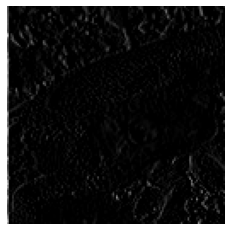

In [60]:
show(out2)

#Q.15. Prewittフィルタ
Prewittフィルタ(3x3)を実装せよ。

Prewitt(プレウィット)フィルタはエッジ抽出フィルタの一種であり、次式で定義される。 これは微分フィルタを3x3に拡大したものである。

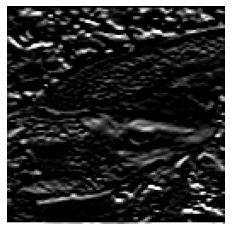

In [68]:
def Prewitt_filter(img, siz = 3):
    H, W = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out1 = np.zeros((H + padding*2, W + padding*2), dtype = np.float)
    out1[padding: padding+H, padding: padding+W] = img.copy()
    out2 = out1.copy()

    out_tmp = out1.copy()
    
    # vertical
    v = [[1., 1., 1.],[0., 0., 0.],[-1., -1., -1.]]
    # horizontal
    h = [[1., 0., -1.],[1., 0., -1.], [1., 0., -1.]]
    
    for y in range(H):
        for x in range(W):
            out1[y+padding, x+padding] = np.sum(v * (out_tmp[y: y+siz, x: x+siz]))
            out2[y+padding, x+padding] = np.sum(h * (out_tmp[y: y+siz, x: x+siz]))

    out1 = np.clip(out1[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)
    out2 = np.clip(out2[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out1, out2
img_gray = gray(img_orig)
out1, out2 = Prewitt_filter(img_gray)

show(out1)

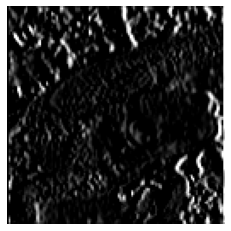

In [64]:
show(out2)

#Q.16. Sobelフィルタ
Sobelフィルタ(3x3)を実装せよ。

Sobel(ソーベル)フィルタもエッジを抽出するフィルタであり、次式でそれぞれ定義される。 これはprewittフィルタの中心部分に重みをつけたフィルタである。

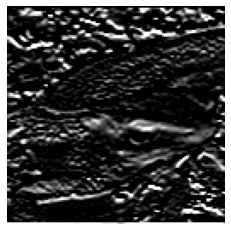

In [75]:
def Sobel_filter(img, siz = 3):
    H, W = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out1 = np.zeros((H + padding*2, W + padding*2), dtype = np.float)
    out1[padding: padding+H, padding: padding+W] = img.copy()
    out2 = out1.copy()

    out_tmp = out1.copy()
    
    # vertical
    v = [[1., 2., 1.],[0., 0., 0.],[-1., -2., -1.]]
    # horizontal
    h = [[1., 0., -1.],[2., 0., -2.], [1., 0., -1.]]
    
    for y in range(H):
        for x in range(W):
            out1[y+padding, x+padding] = np.sum(v * (out_tmp[y: y+siz, x: x+siz]))
            out2[y+padding, x+padding] = np.sum(h * (out_tmp[y: y+siz, x: x+siz]))

    out1 = np.clip(out1[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)
    out2 = np.clip(out2[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out1, out2
img_gray = gray(img_orig)
out1, out2 = Sobel_filter(img_gray)

show(out1)

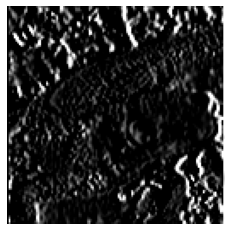

In [66]:
show(out2)

#Q.17. Laplacianフィルタ
Laplacianフィルタを実装せよ。

Laplacian（ラプラシアン）フィルタとは輝度の二次微分をとることでエッジ検出を行うフィルタである。

デジタル画像は離散データであるので、x方向・y方向の一次微分は、それぞれ次式で表される。（微分フィルタと同じ）

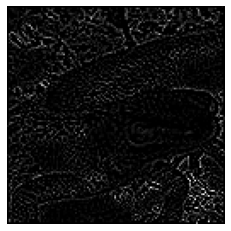

In [82]:
def Laplacian_filter(img, siz = 3):
    H, W = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()
    
    out_tmp = out.copy()
    
    # Laplacian
    laplacian = [[0., 1., 0.], [1., -4., 1.], [0., 1., 0.]]
    
    for y in range(H):
        for x in range(W):
            out[y+padding, x+padding] = np.sum(laplacian * (out_tmp[y: y+siz, x: x+siz]))

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
img_gray = gray(img_orig)
out = Laplacian_filter(img_gray)

show(out)

# Q.18. Embossフィルタ
Embossフィルタを実装せよ。

Embossフィルタとは輪郭部分を浮き出しにするフィルタで、次式で定義される。

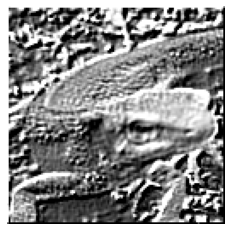

In [83]:
def Laplacian_filter(img, siz = 3):
    H, W = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()
    
    out_tmp = out.copy()
    
    # Laplacian
    laplacian = [[-2., -1., 0.], [-1., 1., 1.], [0., 1., 2.]]
    
    for y in range(H):
        for x in range(W):
            out[y+padding, x+padding] = np.sum(laplacian * (out_tmp[y: y+siz, x: x+siz]))

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
img_gray = gray(img_orig)
out = Laplacian_filter(img_gray)

show(out)

# Q.19. LoGフィルタ
LoGフィルタ(sigma=3、カーネルサイズ=5)を実装し、imori_noise.jpgのエッジを検出せよ。

LoGフィルタとはLaplacian of Gaussianであり、ガウシアンフィルタで画像を平滑化した後にラプラシアンフィルタで輪郭を取り出すフィルタである。

Laplcianフィルタは二次微分をとるのでノイズが強調されるのを防ぐために、予めGaussianフィルタでノイズを抑える。LoGフィルタは次式で定義される。

ラプラシアンを∇^2、ガウシアンフィルタをG、画像をIとする。次式によって、ガウシアンフィルタリング後にラプラシアンフィルタする操作を、ガウシアンフィルタをラプラシアンしたものでフィルタリングする操作に置き換えることが可能。

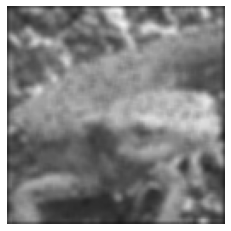

In [91]:
def LoG_filter(img, siz = 5, sigma = 3):
    H, W = img.shape

    # padding(端は周りがないから黒で埋める)
    padding = siz//2
    out = np.zeros((H + padding*2, W + padding*2), dtype = np.float)
    out[padding: padding+H, padding: padding+W] = img.copy()
    
    out_tmp = out.copy()
    
    # LoG
    K = np.zeros((siz, siz), dtype=np.float)
    for xx in range(siz):
        for yy in range(siz):
            x = xx - padding
            y = yy - padding
            K[yy, xx] = (x ** 2 + y ** 2 - 2 * (sigma ** 2)) * np.exp( - (x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * (sigma**2))
    K /= K.sum()
    
    for y in range(H):
        for x in range(W):
            out[y+padding, x+padding] = np.sum(K * (out_tmp[y: y+siz, x: x+siz]))

    out = np.clip(out[padding: padding+H, padding: padding+W], 0., 255.).astype(np.uint8)

    return out
img_gray = gray(img_noise)
out = LoG_filter(img_gray)

show(out)

# Q.20. ヒストグラム表示
matplotlibを用いてimori_dark.jpgのヒストグラムを表示せよ。

ヒストグラムとは画素の出現回数をグラフにしたものである。 matplotlibではhist()という関数がすでにあるので、それを利用する。

In [94]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg

--2021-04-05 19:41:32--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5941 (5.8K) [image/jpeg]
Saving to: ‘imori_dark.jpg’

imori_dark.jpg      100%[===================>]   5.80K  --.-KB/s    in 0s      

2021-04-05 19:41:32 (24.8 MB/s) - ‘imori_dark.jpg’ saved [5941/5941]



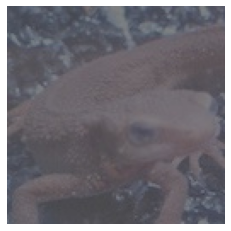

In [95]:
img_dark = cv2.imread("imori_dark.jpg")
show(img_dark)

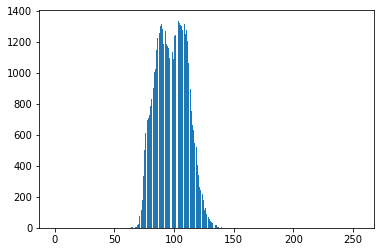

In [102]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(img_dark.ravel(), bins=255, rwidth=0.8, range=(0, 255))
fig.show()